# <center> ANÁLISE DE DADOS COM PYTHON </center>

## Tópico II: Manipulação de Dataframe e Agrupamento (GROUPBY) - Data Wranling
_____________________________________________________________________________________

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# IMPORTANDO O DATASET: MICRODADDOS ENEM 2021
#---------------------------------------------
microdados_ENEM_path = 'C:/Users/Usuário/Desktop/DATA SCIENCE - PROJETOS E APRENDIZAGEM/MICRODADOS_ENEM_2021.csv'
ENEM_dataset = pd.read_csv(microdados_ENEM_path, sep = ';', encoding = 'iso8859_10')

In [4]:
df_ENEM_2021 = pd.DataFrame(ENEM_dataset)
#----------------------------------------
# Informações:
#df_ENEM_2021.head(10)
#df_ENEM_2021.info()
#df_ENEM_2021.describe()
print(f"Dimensões: {df_ENEM_2021.shape} \nParâmetros:")
df_ENEM_2021.columns

Dimensões: (3389832, 76) 
Parâmetros:


Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [5]:
# Selecionando apenas as colunas de Sexo e Nota de Redação
#---------------------------------------------------------
#df_sexo_notaRedacao = df_ENEM_2021[['TP_SEXO', 'NU_NOTA_REDACAO']]
# OU
df_sexo_notaRedacao =  df_ENEM_2021.filter(items = ['TP_SEXO', 'NU_NOTA_REDACAO'])
#---------------------------------------------------------
df_sexo_notaRedacao.head()

,TP_SEXO,NU_NOTA_REDACAO
0,F,760.0
1,M,560.0
2,F,NaN
3,M,780.0
4,F,780.0


In [5]:
# Para excluir registros com valores "NaN" 
#-----------------------------------------
df_sexo_notaRedacao = df_sexo_notaRedacao.dropna()
#-----------------------------------------
df_sexo_notaRedacao.head()

,TP_SEXO,NU_NOTA_REDACAO
0,F,760.0
1,M,560.0
3,M,780.0
4,F,780.0
6,F,480.0


In [6]:
# AGRUPAMENTO -> df.groupby('coluna_categórica').operação()
#----------------------------------------------------------
# I) Contagem
df_sexo_notaRedacao.groupby('TP_SEXO').count()

,NU_NOTA_REDACAO
TP_SEXO,
F,1470366
M,908013


In [7]:
# II) Média
#----------
df_sexo_notaRedacao.groupby('TP_SEXO').mean()

,NU_NOTA_REDACAO
TP_SEXO,
F,624.351338
M,595.929464


In [8]:
# III) Mediana
#-------------
df_sexo_notaRedacao.groupby('TP_SEXO').median()

,NU_NOTA_REDACAO
TP_SEXO,
F,620.0
M,600.0


In [9]:
# IV) Máximo
#-----------
df_sexo_notaRedacao.groupby('TP_SEXO').max()

,NU_NOTA_REDACAO
TP_SEXO,
F,1000.0
M,1000.0


In [10]:
# IV) Mínimo
#-----------
df_sexo_notaRedacao.groupby('TP_SEXO').min()

,NU_NOTA_REDACAO
TP_SEXO,
F,0.0
M,0.0


In [11]:
# Exemplo 1: Nota mínima MAIOR QUE ZERO 
#--------------------------------------
df_sexo_notaRedacao[df_sexo_notaRedacao.NU_NOTA_REDACAO > 0].groupby('TP_SEXO').min()

,NU_NOTA_REDACAO
TP_SEXO,
F,40.0
M,40.0


In [12]:
# Exemplo 2: Nota máxima MENOR QUE 1000
#--------------------------------------
df_sexo_notaRedacao[df_sexo_notaRedacao.NU_NOTA_REDACAO < 1000].groupby('TP_SEXO').max()

,NU_NOTA_REDACAO
TP_SEXO,
F,980.0
M,980.0


TP_SEXO
F    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
M    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

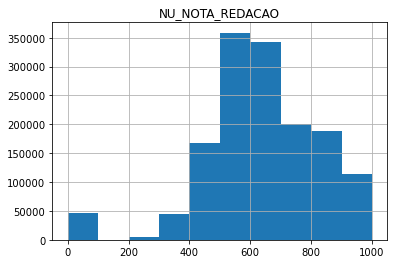

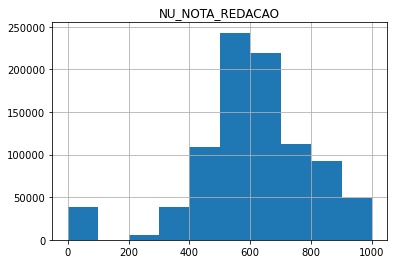

In [13]:
# VISUALIZAÇÃO COM GROUPBY - DISTRIBUIÇÃO COM HISTOGRAMA
#-------------------------------------------------------
df_sexo_notaRedacao.groupby('TP_SEXO').hist()

In [14]:
# MEDIDAS ESTATÍSTICAS DESCRITIVAS
#---------------------------------
df_sexo_notaRedacao.groupby('TP_SEXO').describe()

NU_NOTA_REDACAO                                                    \
                  count        mean         std  min    25%    50%    75%   
TP_SEXO                                                                     
F             1470366.0  624.351338  189.050757  0.0  520.0  620.0  760.0   
M              908013.0  595.929464  192.081911  0.0  520.0  600.0  720.0   

                 
            max  
TP_SEXO          
F        1000.0  
M        1000.0


### <i>Insight</i>: Sexo não é um bom indicativo para notas das redações! 
##### - E a interação de sexo com o resto das notas (CN, CH, LC, MT)?
________________________________________________________________________________________________

### <center> RELAÇÃO ENTRE OS FATORES SOCIOECONÔMICOS e NOTAS (Redação e Modalidades) </center>

In [6]:
# Dicionário de Itens 
dicionario_parametrosENEM_path = 'C:/Users/Usuário/Desktop/DATA SCIENCE - PROJETOS E APRENDIZAGEM/Dicionario_Microdados_Enem_2021_Dataset.xlsx'
dicionario_ENEM_dataset = pd.read_excel(dicionario_parametrosENEM_path)

In [7]:
df_dicionario_ENEM = pd.DataFrame(dicionario_ENEM_dataset)
df_dicionario_ENEM.head()

,NOME_VARIAVEL,DESCRICAO,CATEGORIA,DESCRICAO.1,TAMANHO,TIPO
0,NU_INSCRICAO,Número de inscrição,NaN,NaN,12,Numérica
1,NU_ANO,Ano do Enem,NaN,NaN,4,Numérica
2,TP_FAIXA_ETARIA,Faixa etária,1,Menor de 17 anos,2,Numérica
3,TP_FAIXA_ETARIA,Faixa etária,2,17 anos,2,Numérica
4,TP_FAIXA_ETARIA,Faixa etária,3,18 anos,2,Numérica


In [9]:
df_nome_descricao = df_dicionario_ENEM[['NOME_VARIAVEL', 'DESCRICAO']]
df_dicionario_ENEM_atualizado =  df_dicionario_ENEM[['NOME_VARIAVEL', 'CATEGORIA', 'DESCRICAO.1']]

In [10]:
# Data cleaning
#--------------
df_nome_descricao.drop_duplicates(keep='first', inplace=True)
df_nome_descricao.reset_index(inplace=True)
df_nome_descricao.drop(columns = ['index'], inplace=True)

C:\Users\Usuário\AppData\Local\Temp\ipykernel_15684\3902695644.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nome_descricao.drop_duplicates(keep='first', inplace=True)
C:\Users\Usuário\AppData\Local\Temp\ipykernel_15684\3902695644.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nome_descricao.drop(columns = ['index'], inplace=True)


In [11]:
# FATORES SOCIODEMOGRÁFICOS!
#---------------------------
# SUB-DATASET
fatores_sociodemograficos = df_nome_descricao.iloc[59:, 0:]
#---------------------------
# Data cleaning
fatores_sociodemograficos.reset_index(inplace=True)
fatores_sociodemograficos.drop(columns = ['index'])

,NOME_VARIAVEL,DESCRICAO
0,Q001,"Até que série seu pai, ou o homem responsável ..."
1,Q002,"Até que série sua mãe, ou a mulher responsável..."
2,Q003,A partir da apresentação de algumas ocupações ...
3,Q004,A partir da apresentação de algumas ocupações ...
4,Q005,"Incluindo você, quantas pessoas moram atualmen..."
5,Q006,Qual é a renda mensal de sua família? (Some a ...
6,Q007,Em sua residência trabalha empregado(a) domést...
7,Q008,Na sua residência tem banheiro?
8,Q009,Na sua residência tem quartos para dormir?
9,Q010,Na sua residência tem carro?


In [12]:
# SELECIONANDO COLUNAS DO DATASET ORIGINAL (MICRODADODS ENEM 2021)
#-----------------------------------------------------------------
DF_DADOS_SOCIODEMOG = df_ENEM_2021.filter(['TP_FAIXA_ETARIA', 'TP_SEXO','TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_ESCOLA', 'TP_ENSINO', 'SG_UF_ESC',
'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004','Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012',
'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025'])
#-----------------------------------------------------------------
# Infos:
#DF_DADOS_SOCIODEMOG.info()
DF_DADOS_SOCIODEMOG.describe(include = ['object'])
DF_DADOS_SOCIODEMOG.columns
#DF_DADOS_SOCIODEMOG.shape

Index(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_ESCOLA', 'TP_ENSINO', 'SG_UF_ESC', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003',
       'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012',
       'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021',
       'Q022', 'Q023', 'Q024', 'Q025'],
      dtype='object')

In [13]:
# FATORES ESTATÍSTICOS DESCRITIVOS SOBRE AS QUESTÕES RELATIVAS AOS DADOS SOCIODEMOGRÁFICOS
#-----------------------------------------------------------------------------------------
descricaoEstatistica_variaveisCategoricas = DF_DADOS_SOCIODEMOG.describe(include = ['object'])

In [14]:
# Dataframe TRANSPOSTO:
DE_variaveisCategoricas_transposta = descricaoEstatistica_variaveisCategoricas.transpose()
#----------------------------------------------------------------------------------------
# Criando parâmetro PORCENTAGEM -> 100 * frequência do valor top (freq) / contagem total (count)
DE_variaveisCategoricas_transposta['perc_freq/count'] = 100*DE_variaveisCategoricas_transposta['freq']/DE_variaveisCategoricas_transposta['count']
#----------------------------------------------------------------------------------------
DE_variaveisCategoricas_transposta
#----------------------------------------------------------------------------------------
# Todas espostas possíveis e suas categorias estão salvas nos Dataframes
# "df_dicionario_ENEM_atualizado" e "fatores_sociodemograficos"

,count,unique,top,freq,perc_freq/count
TP_SEXO,3389832,2,F,2090526,61.67049
SG_UF_ESC,813806,27,SP,139473,17.13836
Q001,3389830,8,E,955155,28.177077
Q002,3389830,8,E,1148575,33.882968
Q003,3389830,6,C,779251,22.987908
Q004,3389830,6,B,1407976,41.535298
Q006,3389830,17,B,932838,27.518725
Q007,3389830,4,A,3106217,91.633415
Q008,3389830,5,B,2213952,65.311594
Q009,3389830,5,C,1662443,49.042076


In [15]:
# RESPOSTAS POSSÍVEIS DAS QUESTÕES SOCIODEMOGRÁFICAS (CATEGORIA E SUA DESCRIÇÃO)
#-------------------------------------------------------------------------------
questoes_sociodemograficas = df_dicionario_ENEM_atualizado.iloc[218:, 0:]
questoes_sociodemograficas = questoes_sociodemograficas.reset_index().drop(columns = ['index'])

In [16]:
questoes_sociodemograficas

,NOME_VARIAVEL,CATEGORIA,DESCRICAO.1
0,Q001,A,Nunca estudou.
1,Q001,B,Não completou a 4ª série/5º ano do Ensino Fund...
2,Q001,C,"Completou a 4ª série/5º ano, mas não completou..."
3,Q001,D,Completou a 8ª série/9º ano do Ensino Fundamen...
4,Q001,E,"Completou o Ensino Médio, mas não completou a ..."
...,...,...,...
139,Q024,C,"Sim, dois."
140,Q024,D,"Sim, três."
141,Q024,E,"Sim, quatro ou mais."
142,Q025,A,Não.


In [17]:
# DICIONÁRIO DAS RESPOSTAS - QUESTÕES SOCIODEMOGRÁFICAS
#------------------------------------------------------
# Q0001 - "Até que série seu pai, ou o homem responsável por você, estudou?"
dict_Q01 = {'A': 'Nunca estudou.',
'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental.',
'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
'E': 'Completou o Ensino Médio, mas não completou a Faculdade.',
'F': 'Completou a Faculdade, mas não completou a Pós-graduação.',
'G': 'Completou a Pós-graduação.',
'H': 'Não sei.'}
#------------------------------------------------------
# Q002 - "Até que série sua mãe, ou a mulher responsável por você, estudou?"
dict_Q02 = {'A': 'Nunca estudou.',
'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental.',
'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
'E': 'Completou o Ensino Médio, mas não completou a Faculdade.',
'F': 'Completou a Faculdade, mas não completou a Pós-graduação.',
'G': 'Completou a Pós-graduação.',
'H': 'Não sei.'}
#-----------------------------------------------------
# Q003 - OCUPAÇÃO PAI OU HOMEM RESPONSÁVEL
dict_Q03 = {'A': 'Grupo 1: Lavrador, agricultor sem empregados, bóia fria, criador de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultor, pescador, lenhador, seringueiro, extrativista.',
'B': 'Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria.',
'C': 'Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista.',
'D': 'Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria.',
'E': 'Grupo 5: Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capitão, coronel, professor universitário, diretor em empresas públicas ou privadas, político, proprietário de empresas com mais de 10 empregados.',
'F': 'Não sei.'}
#-----------------------------------------------------
# OCUPAÇÃO MÃE OU MULHER RESPONSÁVEL
dict_Q04 = {'A': 'Grupo 1: Lavrador, agricultor sem empregados, bóia fria, criador de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultor, pescador, lenhador, seringueiro, extrativista.',
'B': 'Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria.',
'C': 'Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista.',
'D': 'Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria.',
'E': 'Grupo 5: Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capitão, coronel, professor universitário, diretor em empresas públicas ou privadas, político, proprietário de empresas com mais de 10 empregados.',
'F': 'Não sei.'}
#-----------------------------------------------------
dict_Q05 = {}
#-----------------------------------------------------
# RENDA FAMILIAR
dict_Q06 = {'A': 'Nenhuma Renda',
'B': 'Até R$ 1.100,00',
'C': 'De R$ 1.100,01 até R$ 1.650,00.',
'D': 'De R$ 1.650,01 até R$ 2.200,00.',
'E': 'De R$ 2.200,01 até R$ 2.750,00.',
'F': 'De R$ 2.750,01 até R$ 3.300,00.',
'G': 'De R$ 3.300,01 até R$ 4.400,00.',
'H': 'De R$ 4.400,01 até R$ 5.500,00.',
'I': 'De R$ 5.500,01 até R$ 6.600,00.',
'J': 'De R$ 6.600,01 até R$ 7.700,00.',
'K': 'De R$ 7.700,01 até R$ 8.800,00.',
'L': 'De R$ 8.800,01 até R$ 9.900,00.',
'M': 'De R$ 9.900,01 até R$ 11.000,00.',
'N': 'De R$ 11.000,01 até R$ 13.200,00.',
'O': 'De R$ 13.200,01 até R$ 16.500,00.',
'P': 'De R$ 16.500,01 até R$ 22.000,00.',
'Q': 'Acima de R$ 22.000,00.'}
#-----------------------------------------------------
dict_Q07 = {}
#----------------------------------------------------
dict_Q08 = {}
#----------------------------------------------------
dict_Q09 = {}
#----------------------------------------------------
dict_Q10 = {}
#----------------------------------------------------
dict_Q11 = {}
#----------------------------------------------------
dict_Q12 = {}
#----------------------------------------------------
dict_Q13 = {}
#----------------------------------------------------
dict_Q14 = {}
#----------------------------------------------------
dict_Q15 = {}
#----------------------------------------------------
dict_Q16 = {}
#----------------------------------------------------
dict_Q17 = {}
#----------------------------------------------------
dict_Q18 = {}
#----------------------------------------------------
dict_Q19 = {}
#----------------------------------------------------
dict_Q20 = {}
#----------------------------------------------------
dict_Q21 = {}
#----------------------------------------------------
dict_Q22 = {}
#----------------------------------------------------
dict_Q23 = {}
#----------------------------------------------------
# Q024 - COMPUTADORES EM CASA
dict_Q24 = {'A': 'Não.', 'B': 'Sim, um.', 'C': 'Sim, dois.', 'D': 'Sim, três.', 'E': 'Sim, quatro ou mais.'}
#----------------------------------------------------
dict_Q25 = {}

In [18]:
# DATAFRAME COM PARÂMETROS DAS QUESTÕES S.D. SELECIONADAS
#--------------------------------------------------------
df_dados_SD_selecionados = df_ENEM_2021[['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO','TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_ESCOLA', 'TP_ENSINO', 'SG_UF_ESC',
'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q006', 'Q024']]
df_dados_SD_selecionados.shape

(3389832, 19)

_____________________
#### <b>Q001)</b> Relação entre <b>ESCOLARIDADE DO PAI</b> e <b>NOTAS</b>

In [19]:
# SELECIONANDO REGISTROS SEM ENTRADAS DE VALORES "NAN" NA QUESTÃO 01 (S.D.)
#--------------------------------------------------------------------------
df_Q01_dropNAN = df_dados_SD_selecionados.dropna(subset = 'Q001')
df_Q01_dropNAN.shape

(3389830, 19)

In [88]:
# DATAFRAME CRIADO COM RESPOSTAS DAS QUESTÕES S.D.
#-------------------------------------------------
# PARÂMETRO NOVO CONTENDO AS RESPOSTAS
df_Q01_dropNAN['Q001_RESPOSTAS'] = [dict_Q01[resp] for resp in df_Q01_dropNAN.Q001]
# SELECIONANDO PARÂMETROS DESEJADOS EM UM NOVO DATAFRAME
DF_ENEM_Q001 = df_Q01_dropNAN[['NU_INSCRICAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO','SG_UF_ESC', 'Q001', 'Q001_RESPOSTAS']]
#DF_ENEM_Q001.head()

C:\Users\Usuário\AppData\Local\Temp\ipykernel_15684\3654806370.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Q01_dropNAN['Q001_RESPOSTAS'] = [dict_Q01[resp] for resp in df_Q01_dropNAN.Q001]


In [82]:
# FREQUÊNCIA DAS RESPOSTAS DA QUESTÃO 1
#--------------------------------------
DF_ENEM_Q001[['Q001_RESPOSTAS']].value_counts().to_frame()

,0
Q001_RESPOSTAS,
"Completou o Ensino Médio, mas não completou a Faculdade.",955155
Não completou a 4ª série/5º ano do Ensino Fundamental.,638092
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",453042
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",373620
"Completou a Faculdade, mas não completou a Pós-graduação.",308151
Não sei.,293412
Completou a Pós-graduação.,219969
Nunca estudou.,148389


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Nunca estudou.'),
  Text(1, 0, 'Não completou a 4ª série/5º ano do Ensino Fundamental.'),
  Text(2, 0, 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.'),
  Text(3, 0, 'Não sei.'),
  Text(4, 0, 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.'),
  Text(5, 0, 'Completou o Ensino Médio, mas não completou a Faculdade.'),
  Text(6, 0, 'Completou a Faculdade, mas não completou a Pós-graduação.'),
  Text(7, 0, 'Completou a Pós-graduação.')])

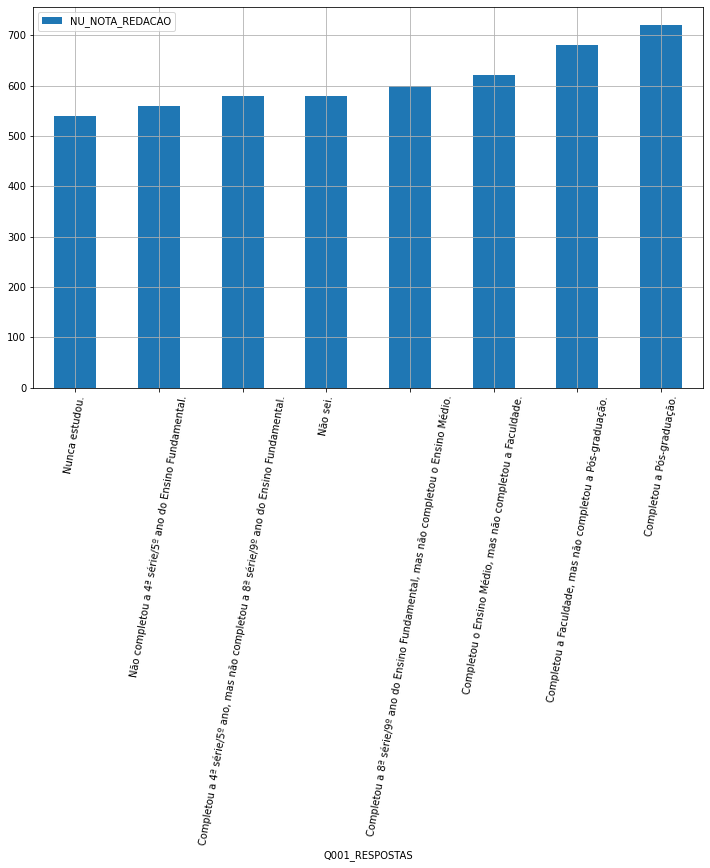

In [81]:
DF_ENEM_Q001[['Q001_RESPOSTAS', 'NU_NOTA_REDACAO']].groupby('Q001_RESPOSTAS').median().sort_values(by = 'NU_NOTA_REDACAO').plot(kind = 'bar', figsize = (12, 7), grid = True)
plt.xticks(rotation=80)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Nunca estudou.'),
  Text(1, 0, 'Não completou a 4ª série/5º ano do Ensino Fundamental.'),
  Text(2, 0, 'Não sei.'),
  Text(3, 0, 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.'),
  Text(4, 0, 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.'),
  Text(5, 0, 'Completou o Ensino Médio, mas não completou a Faculdade.'),
  Text(6, 0, 'Completou a Faculdade, mas não completou a Pós-graduação.'),
  Text(7, 0, 'Completou a Pós-graduação.')])

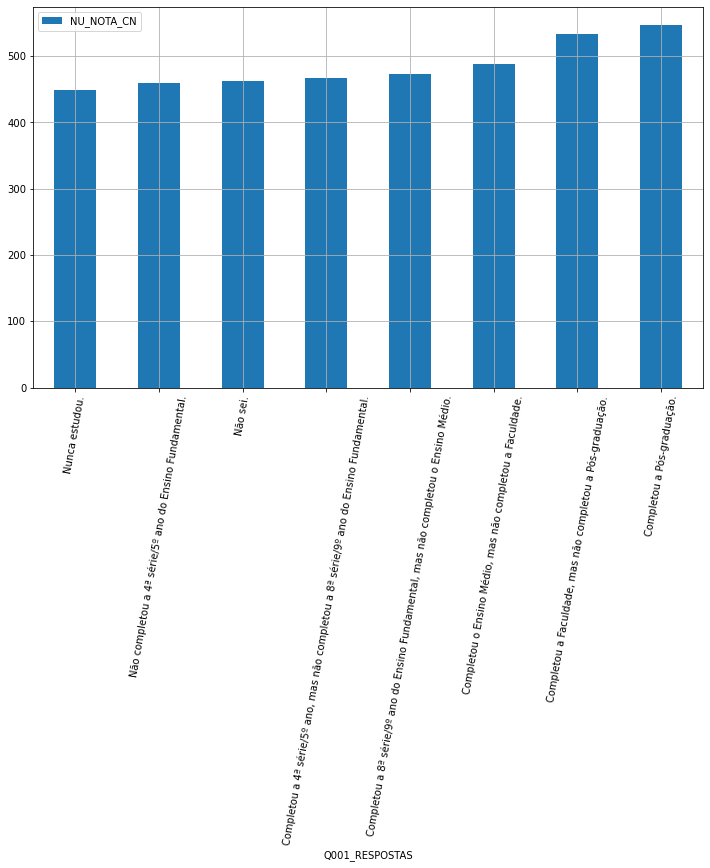

In [80]:
DF_ENEM_Q001[['Q001_RESPOSTAS', 'NU_NOTA_CN']].groupby('Q001_RESPOSTAS').median().sort_values(by = 'NU_NOTA_CN').plot(kind = 'bar', figsize = (12, 7), grid = True)
plt.xticks(rotation=80)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Nunca estudou.'),
  Text(1, 0, 'Não completou a 4ª série/5º ano do Ensino Fundamental.'),
  Text(2, 0, 'Não sei.'),
  Text(3, 0, 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.'),
  Text(4, 0, 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.'),
  Text(5, 0, 'Completou o Ensino Médio, mas não completou a Faculdade.'),
  Text(6, 0, 'Completou a Faculdade, mas não completou a Pós-graduação.'),
  Text(7, 0, 'Completou a Pós-graduação.')])

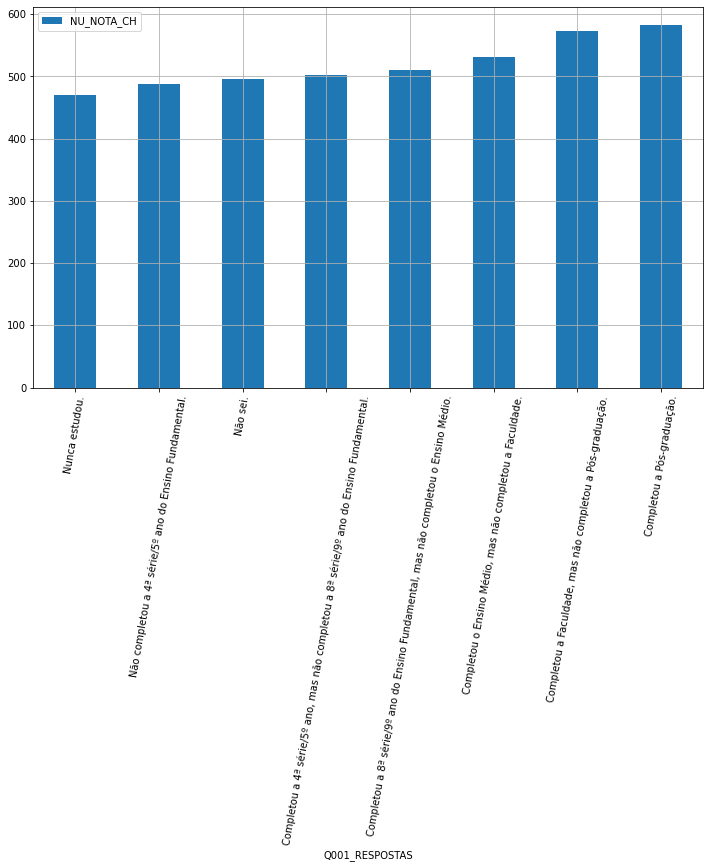

In [79]:
DF_ENEM_Q001[['Q001_RESPOSTAS', 'NU_NOTA_CH']].groupby('Q001_RESPOSTAS').median().sort_values(by = 'NU_NOTA_CH').plot(kind = 'bar', figsize = (12, 7), grid = True)
plt.xticks(rotation=80)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Nunca estudou.'),
  Text(1, 0, 'Não completou a 4ª série/5º ano do Ensino Fundamental.'),
  Text(2, 0, 'Não sei.'),
  Text(3, 0, 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.'),
  Text(4, 0, 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.'),
  Text(5, 0, 'Completou o Ensino Médio, mas não completou a Faculdade.'),
  Text(6, 0, 'Completou a Faculdade, mas não completou a Pós-graduação.'),
  Text(7, 0, 'Completou a Pós-graduação.')])

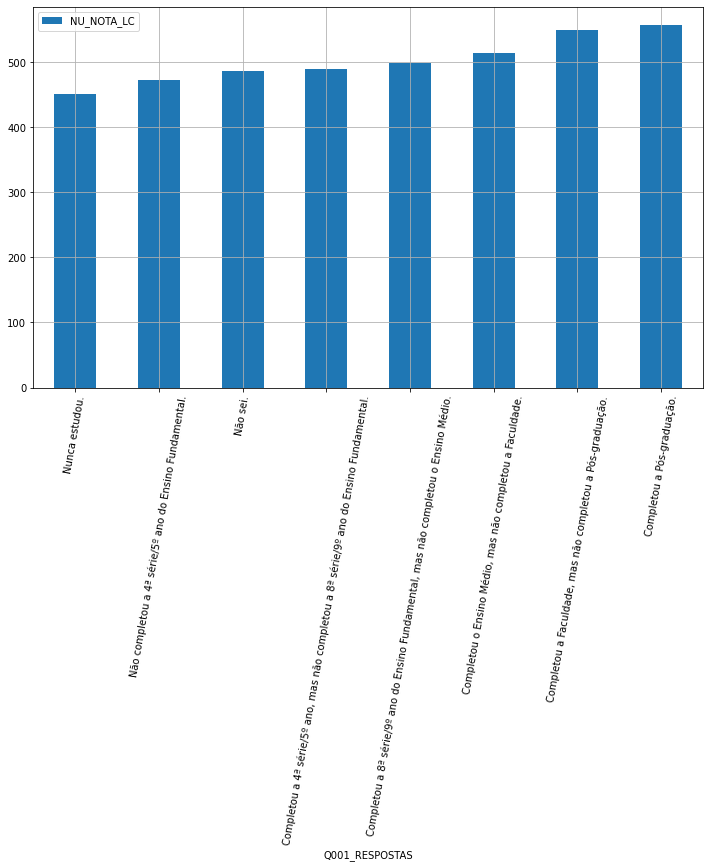

In [78]:
DF_ENEM_Q001[['Q001_RESPOSTAS', 'NU_NOTA_LC']].groupby('Q001_RESPOSTAS').median().sort_values(by = 'NU_NOTA_LC').plot(kind = 'bar', figsize = (12, 7), grid = True)
plt.xticks(rotation=80)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Nunca estudou.'),
  Text(1, 0, 'Não completou a 4ª série/5º ano do Ensino Fundamental.'),
  Text(2, 0, 'Não sei.'),
  Text(3, 0, 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.'),
  Text(4, 0, 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.'),
  Text(5, 0, 'Completou o Ensino Médio, mas não completou a Faculdade.'),
  Text(6, 0, 'Completou a Faculdade, mas não completou a Pós-graduação.'),
  Text(7, 0, 'Completou a Pós-graduação.')])

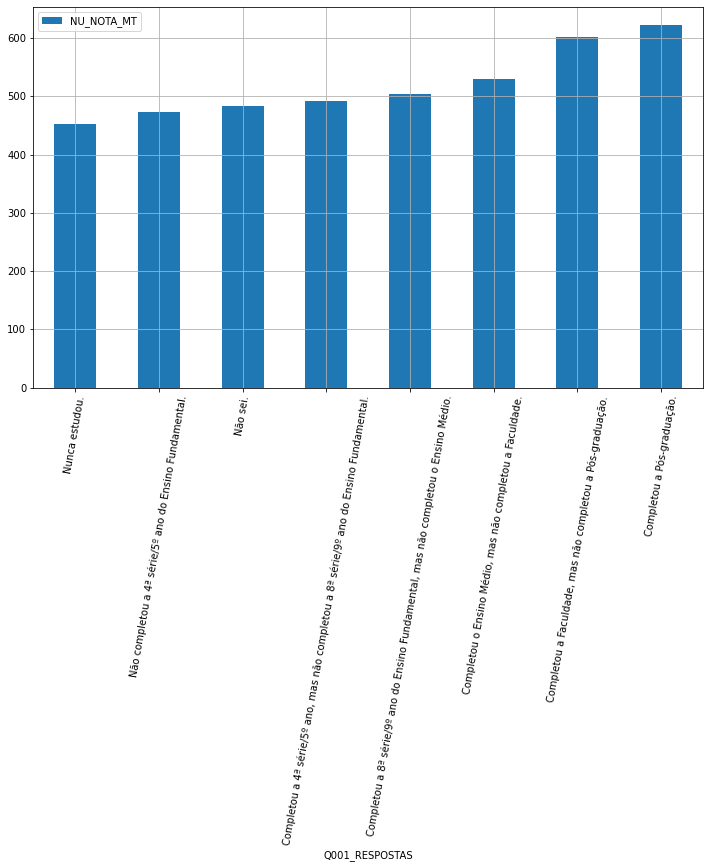

In [77]:
DF_ENEM_Q001[['Q001_RESPOSTAS', 'NU_NOTA_MT']].groupby('Q001_RESPOSTAS').median().sort_values(by = 'NU_NOTA_MT').plot(kind = 'bar', figsize = (12, 7), grid = True)
plt.xticks(rotation=80)

### <i> Insight:</i> Nível de escolaridade do PAI é um bom indicativo para as notas.
##### - Observamos <b>linearidade dos dados</b>!
____________________
### <b>Q006)</b> Relação entre <b>RENDA FAMILIAR</b> e <b>NOTAS</b>

In [26]:
# SELECIONANDO REGISTROS SEM ENTRADAS DE VALORES "NAN" NA QUESTÃO 06 (S.D.)
#--------------------------------------------------------------------------
df_Q06_dropNAN = df_dados_SD_selecionados.dropna(subset = 'Q006')
df_Q06_dropNAN.shape

(3389830, 19)

In [28]:
# DATAFRAME CRIADO COM RESPOSTAS DA QUESTÃO S.D. 06
#--------------------------------------------------
# PARÂMETRO NOVO CONTENDO AS RESPOSTAS
df_Q06_dropNAN['Q006_RESPOSTAS'] = [dict_Q06[resp] for resp in df_Q06_dropNAN.Q006]
# SELECIONANDO PARÂMETROS DESEJADOS EM UM NOVO DATAFRAME
DF_ENEM_Q006 = df_Q06_dropNAN[['NU_INSCRICAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q006', 'Q006_RESPOSTAS']]
DF_ENEM_Q006.head()

C:\Users\Usuário\AppData\Local\Temp\ipykernel_15684\3218475490.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Q06_dropNAN['Q006_RESPOSTAS'] = [dict_Q06[resp] for resp in df_Q06_dropNAN.Q006]


,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006,Q006_RESPOSTAS
0,210053865474,NaN,574.6,472.6,NaN,760.0,D,"De R$ 1.650,01 até R$ 2.200,00."
1,210052384164,505.9,551.8,498.3,461.5,560.0,B,"Até R$ 1.100,00"
2,210052589243,NaN,NaN,NaN,NaN,NaN,C,"De R$ 1.100,01 até R$ 1.650,00."
3,210052128335,580.7,678.9,638.9,659.5,780.0,B,"Até R$ 1.100,00"
4,210051353021,497.7,532.4,457.6,582.6,780.0,C,"De R$ 1.100,01 até R$ 1.650,00."


In [32]:
DF_ENEM_Q006[['Q006_RESPOSTAS']].value_counts().to_frame()

,0
Q006_RESPOSTAS,
"Até R$ 1.100,00",932838
"De R$ 1.100,01 até R$ 1.650,00.",575943
"De R$ 1.650,01 até R$ 2.200,00.",432478
"De R$ 2.750,01 até R$ 3.300,00.",233353
"De R$ 2.200,01 até R$ 2.750,00.",209943
Nenhuma Renda,202114
"De R$ 3.300,01 até R$ 4.400,00.",195709
"De R$ 4.400,01 até R$ 5.500,00.",151384
"De R$ 5.500,01 até R$ 6.600,00.",93898


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Nenhuma Renda'),
  Text(1, 0, 'Até R$ 1.100,00'),
  Text(2, 0, 'De R$ 1.100,01 até R$ 1.650,00.'),
  Text(3, 0, 'De R$ 1.650,01 até R$ 2.200,00.'),
  Text(4, 0, 'De R$ 2.200,01 até R$ 2.750,00.'),
  Text(5, 0, 'De R$ 2.750,01 até R$ 3.300,00.'),
  Text(6, 0, 'De R$ 3.300,01 até R$ 4.400,00.'),
  Text(7, 0, 'De R$ 4.400,01 até R$ 5.500,00.'),
  Text(8, 0, 'De R$ 5.500,01 até R$ 6.600,00.'),
  Text(9, 0, 'De R$ 6.600,01 até R$ 7.700,00.'),
  Text(10, 0, 'De R$ 7.700,01 até R$ 8.800,00.'),
  Text(11, 0, 'De R$ 8.800,01 até R$ 9.900,00.'),
  Text(12, 0, 'De R$ 9.900,01 até R$ 11.000,00.'),
  Text(13, 0, 'De R$ 11.000,01 até R$ 13.200,00.'),
  Text(14, 0, 'De R$ 13.200,01 até R$ 16.500,00.'),
  Text(15, 0, 'De R$ 16.500,01 até R$ 22.000,00.'),
  Text(16, 0, 'Acima de R$ 22.000,00.')])

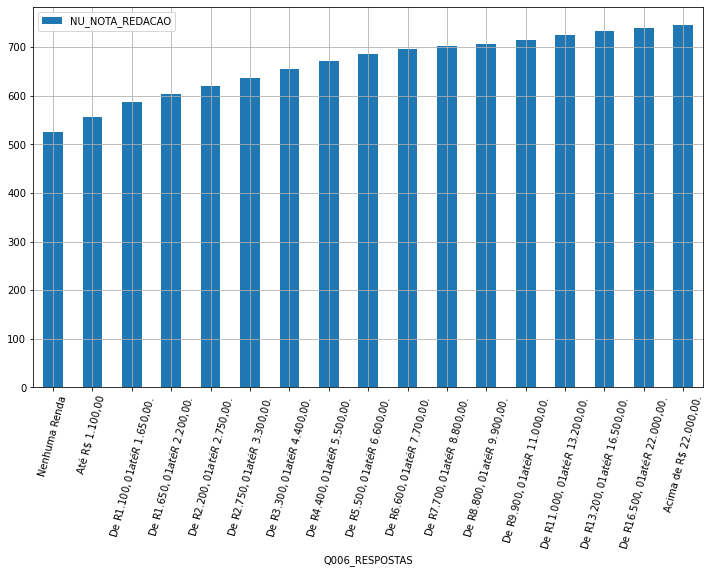

In [70]:
# NOTA DA REDAÇÃO
#----------------
DF_ENEM_Q006[['Q006_RESPOSTAS', 'NU_NOTA_REDACAO']].groupby('Q006_RESPOSTAS').mean().sort_values(by = 'NU_NOTA_REDACAO').plot(kind = 'bar', figsize = (12, 7), grid = True)
plt.xticks(rotation=75)

In [87]:
# NOTA DA REDAÇÃO- ESTATÍSTICA DESCRITIVA
#----------------------------------------
DF_ENEM_Q006[['Q006_RESPOSTAS', 'NU_NOTA_REDACAO']].groupby('Q006_RESPOSTAS').describe()

NU_NOTA_REDACAO                          \
                                            count        mean         std   
Q006_RESPOSTAS                                                              
Acima de R$ 22.000,00.                    42057.0  745.497301  163.619378   
Até R$ 1.100,00                          588935.0  556.643602  189.515663   
De R$ 1.100,01 até R$ 1.650,00.          372201.0  586.749525  182.646898   
De R$ 1.650,01 até R$ 2.200,00.          295951.0  602.864393  180.766723   
De R$ 11.000,01 até R$ 13.200,00.         31212.0  724.961553  168.667926   
De R$ 13.200,01 até R$ 16.500,00.         34188.0  732.545923  165.798384   
De R$ 16.500,01 até R$ 22.000,00.         34197.0  739.105770  165.603164   
De R$ 2.200,01 até R$ 2.750,00.          152297.0  621.044275  181.312306   
De R$ 2.750,01 até R$ 3.300,00.          176865.0  636.142368  179.256211   
De R$ 3.300,01 até R$ 4.400,00.          154584.0  654.233426  177.687632   
De R$ 4.400,01 até R$ 5.500,00.          123949.0  672.012683  175.983596   
De R$ 5.500,01 até R$ 6.600,00.           78592.0  685.820694  175.021793   
De R$ 6.600,01 até R$ 7.700,00.           48832.0  695.652441  172.979071   
De R$ 7.700,01 até R$ 8.800,00.           38613.0  702.488799  171.943361   
De R$ 8.800,01 até R$ 9.900,00.           33900.0  706.623009  172.075806   
De R$ 9.900,01 até R$ 11.000,00.          49832.0  714.390352  169.476887   
Nenhuma Renda                            122173.0  524.900428  193.745340   

                                                                     
                                   min    25%    50%    75%     max  
Q006_RESPOSTAS                                                       
Acima de R$ 22.000,00.             0.0  640.0  760.0  880.0  1000.0  
Até R$ 1.100,00                    0.0  480.0  560.0  660.0  1000.0  
De R$ 1.100,01 até R$ 1.650,00.    0.0  500.0  580.0  680.0  1000.0  
De R$ 1.650,01 até R$ 2.200,00.    0.0  520.0  600.0  700.0   980.0  
De R$ 11.000,01 até R$ 13.200,00.  0.0  620.0  740.0  860.0  1000.0  
De R$ 13.200,01 até R$ 16.500,00.  0.0  620.0  760.0  860.0  1000.0  
De R$ 16.500,01 até R$ 22.000,00.  0.0  640.0  760.0  860.0  1000.0  
De R$ 2.200,01 até R$ 2.750,00.    0.0  540.0  620.0  740.0  1000.0  
De R$ 2.750,01 até R$ 3.300,00.    0.0  540.0  620.0  760.0   980.0  
De R$ 3.300,01 até R$ 4.400,00.    0.0  560.0  640.0  780.0  1000.0  
De R$ 4.400,01 até R$ 5.500,00.    0.0  580.0  660.0  800.0  1000.0  
De R$ 5.500,01 até R$ 6.600,00.    0.0  580.0  680.0  820.0  1000.0  
De R$ 6.600,01 até R$ 7.700,00.    0.0  600.0  700.0  840.0  1000.0  
De R$ 7.700,01 até R$ 8.800,00.    0.0  600.0  700.0  840.0   980.0  
De R$ 8.800,01 até R$ 9.900,00.    0.0  600.0  720.0  840.0  1000.0  
De R$ 9.900,01 até R$ 11.000,00.   0.0  600.0  720.0  840.0  1000.0  
Nenhuma Renda                      0.0  440.0  540.0  620.0   980.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Nenhuma Renda'),
  Text(1, 0, 'Até R$ 1.100,00'),
  Text(2, 0, 'De R$ 1.100,01 até R$ 1.650,00.'),
  Text(3, 0, 'De R$ 1.650,01 até R$ 2.200,00.'),
  Text(4, 0, 'De R$ 2.200,01 até R$ 2.750,00.'),
  Text(5, 0, 'De R$ 2.750,01 até R$ 3.300,00.'),
  Text(6, 0, 'De R$ 3.300,01 até R$ 4.400,00.'),
  Text(7, 0, 'De R$ 4.400,01 até R$ 5.500,00.'),
  Text(8, 0, 'De R$ 5.500,01 até R$ 6.600,00.'),
  Text(9, 0, 'De R$ 6.600,01 até R$ 7.700,00.'),
  Text(10, 0, 'De R$ 7.700,01 até R$ 8.800,00.'),
  Text(11, 0, 'De R$ 8.800,01 até R$ 9.900,00.'),
  Text(12, 0, 'De R$ 9.900,01 até R$ 11.000,00.'),
  Text(13, 0, 'De R$ 11.000,01 até R$ 13.200,00.'),
  Text(14, 0, 'De R$ 13.200,01 até R$ 16.500,00.'),
  Text(15, 0, 'De R$ 16.500,01 até R$ 22.000,00.'),
  Text(16, 0, 'Acima de R$ 22.000,00.')])

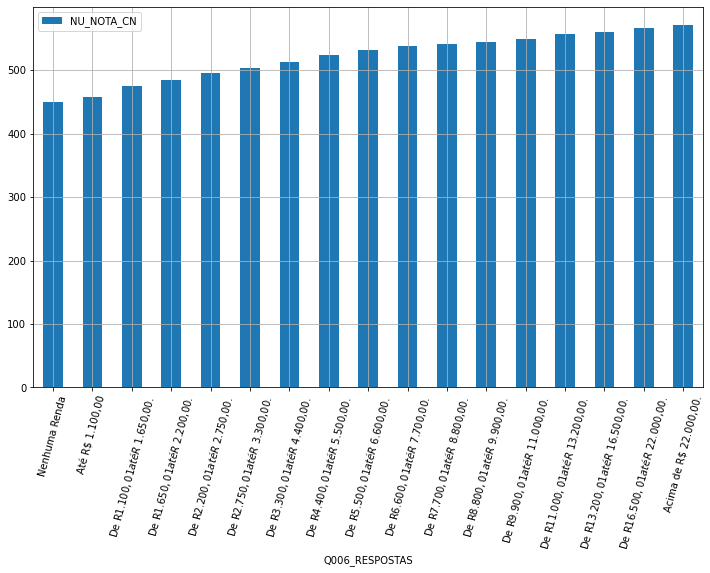

In [69]:
# NOTA DE CIÊNCIAS NATURAIS
#--------------------------
DF_ENEM_Q006[['Q006_RESPOSTAS', 'NU_NOTA_CN']].groupby('Q006_RESPOSTAS').mean().sort_values(by = 'NU_NOTA_CN').plot(kind = 'bar', figsize = (12, 7), grid = True)
plt.xticks(rotation=75)

In [86]:
# NOTA DE CIÊNCIAS NATURAIS - ESTATÍSTICA DESCRITIVA
#---------------------------------------------------
DF_ENEM_Q006[['Q006_RESPOSTAS', 'NU_NOTA_CN']].groupby('Q006_RESPOSTAS').describe()

NU_NOTA_CN                              \
                                       count        mean        std  min   
Q006_RESPOSTAS                                                             
Acima de R$ 22.000,00.               40123.0  571.076158  88.930314  0.0   
Até R$ 1.100,00                     548988.0  458.509785  64.206755  0.0   
De R$ 1.100,01 até R$ 1.650,00.     347915.0  475.132601  69.081935  0.0   
De R$ 1.650,01 até R$ 2.200,00.     278546.0  485.116422  72.204619  0.0   
De R$ 11.000,01 até R$ 13.200,00.    30142.0  556.360902  86.722605  0.0   
De R$ 13.200,01 até R$ 16.500,00.    32989.0  560.831101  86.818727  0.0   
De R$ 16.500,01 até R$ 22.000,00.    32933.0  566.171044  87.296125  0.0   
De R$ 2.200,01 até R$ 2.750,00.     144398.0  495.508134  75.474895  0.0   
De R$ 2.750,01 até R$ 3.300,00.     168484.0  502.691210  77.206590  0.0   
De R$ 3.300,01 até R$ 4.400,00.     148032.0  513.692312  79.996256  0.0   
De R$ 4.400,01 até R$ 5.500,00.     119090.0  523.483172  82.248801  0.0   
De R$ 5.500,01 até R$ 6.600,00.      75664.0  531.156403  83.746762  0.0   
De R$ 6.600,01 até R$ 7.700,00.      47088.0  537.595377  84.005530  0.0   
De R$ 7.700,01 até R$ 8.800,00.      37263.0  541.617503  85.269968  0.0   
De R$ 8.800,01 até R$ 9.900,00.      32657.0  544.889163  85.203002  0.0   
De R$ 9.900,01 até R$ 11.000,00.     48016.0  549.823503  85.872563  0.0   
Nenhuma Renda                       113515.0  449.129845  62.093697  0.0   

                                                               
                                     25%    50%    75%    max  
Q006_RESPOSTAS                                                 
Acima de R$ 22.000,00.             511.8  578.2  631.2  867.1  
Até R$ 1.100,00                    411.2  451.4  497.6  856.6  
De R$ 1.100,01 até R$ 1.650,00.    424.3  468.2  519.3  856.2  
De R$ 1.650,01 até R$ 2.200,00.    431.8  478.4  533.1  856.6  
De R$ 11.000,01 até R$ 13.200,00.  495.1  562.3  616.6  867.1  
De R$ 13.200,01 até R$ 16.500,00.  500.6  566.5  620.7  856.6  
De R$ 16.500,01 até R$ 22.000,00.  507.4  573.2  625.2  856.6  
De R$ 2.200,01 até R$ 2.750,00.    439.5  489.6  547.2  814.9  
De R$ 2.750,01 até R$ 3.300,00.    444.7  497.7  556.8  856.6  
De R$ 3.300,01 até R$ 4.400,00.    453.7  510.9  570.6  867.1  
De R$ 4.400,01 até R$ 5.500,00.    461.5  522.5  582.5  856.6  
De R$ 5.500,01 até R$ 6.600,00.    468.5  532.0  590.2  856.6  
De R$ 6.600,01 até R$ 7.700,00.    475.3  539.5  597.6  829.4  
De R$ 7.700,01 até R$ 8.800,00.    479.1  544.5  601.5  848.7  
De R$ 8.800,01 até R$ 9.900,00.    482.7  548.4  605.0  867.1  
De R$ 9.900,01 até R$ 11.000,00.   488.0  554.5  609.7  856.6  
Nenhuma Renda                      403.8  441.5  485.4  824.4

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Nenhuma Renda'),
  Text(1, 0, 'Até R$ 1.100,00'),
  Text(2, 0, 'De R$ 1.100,01 até R$ 1.650,00.'),
  Text(3, 0, 'De R$ 1.650,01 até R$ 2.200,00.'),
  Text(4, 0, 'De R$ 2.200,01 até R$ 2.750,00.'),
  Text(5, 0, 'De R$ 2.750,01 até R$ 3.300,00.'),
  Text(6, 0, 'De R$ 3.300,01 até R$ 4.400,00.'),
  Text(7, 0, 'De R$ 4.400,01 até R$ 5.500,00.'),
  Text(8, 0, 'De R$ 5.500,01 até R$ 6.600,00.'),
  Text(9, 0, 'De R$ 6.600,01 até R$ 7.700,00.'),
  Text(10, 0, 'De R$ 7.700,01 até R$ 8.800,00.'),
  Text(11, 0, 'De R$ 8.800,01 até R$ 9.900,00.'),
  Text(12, 0, 'De R$ 9.900,01 até R$ 11.000,00.'),
  Text(13, 0, 'De R$ 11.000,01 até R$ 13.200,00.'),
  Text(14, 0, 'De R$ 13.200,01 até R$ 16.500,00.'),
  Text(15, 0, 'De R$ 16.500,01 até R$ 22.000,00.'),
  Text(16, 0, 'Acima de R$ 22.000,00.')])

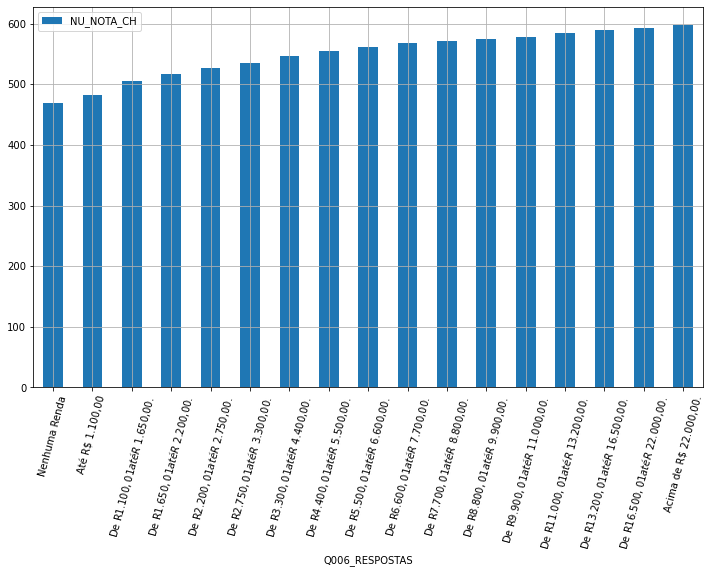

In [71]:
# NOTA DE CIÊNCIAS HUMANAS
#-------------------------
DF_ENEM_Q006[['Q006_RESPOSTAS', 'NU_NOTA_CH']].groupby('Q006_RESPOSTAS').mean().sort_values(by = 'NU_NOTA_CH').plot(kind = 'bar', figsize = (12, 7), grid = True)
plt.xticks(rotation=75)

In [85]:
# NOTA DE CIÊNCIAS HUMANAS- ESTATÍSTICA DESCRITIVA
#-------------------------------------------------
DF_ENEM_Q006[['Q006_RESPOSTAS', 'NU_NOTA_CH']].groupby('Q006_RESPOSTAS').describe()

NU_NOTA_CH                              \
                                       count        mean        std  min   
Q006_RESPOSTAS                                                             
Acima de R$ 22.000,00.               42057.0  597.416761  96.171878  0.0   
Até R$ 1.100,00                     588935.0  482.629883  83.984908  0.0   
De R$ 1.100,01 até R$ 1.650,00.     372201.0  504.587847  88.113713  0.0   
De R$ 1.650,01 até R$ 2.200,00.     295951.0  516.685211  89.880066  0.0   
De R$ 11.000,01 até R$ 13.200,00.    31212.0  585.097517  94.665789  0.0   
De R$ 13.200,01 até R$ 16.500,00.    34188.0  589.675939  94.159844  0.0   
De R$ 16.500,01 até R$ 22.000,00.    34197.0  593.055625  94.825863  0.0   
De R$ 2.200,01 até R$ 2.750,00.     152297.0  527.487211  91.313328  0.0   
De R$ 2.750,01 até R$ 3.300,00.     176865.0  535.009441  91.429782  0.0   
De R$ 3.300,01 até R$ 4.400,00.     154584.0  546.376201  92.856981  0.0   
De R$ 4.400,01 até R$ 5.500,00.     123949.0  554.900370  94.016524  0.0   
De R$ 5.500,01 até R$ 6.600,00.      78592.0  561.882783  94.259142  0.0   
De R$ 6.600,01 até R$ 7.700,00.      48832.0  568.617939  93.748148  0.0   
De R$ 7.700,01 até R$ 8.800,00.      38613.0  571.383853  94.333180  0.0   
De R$ 8.800,01 até R$ 9.900,00.      33900.0  574.403280  94.575182  0.0   
De R$ 9.900,01 até R$ 11.000,00.     49832.0  578.172331  94.730614  0.0   
Nenhuma Renda                       122173.0  469.516755  82.028204  0.0   

                                                               
                                     25%    50%    75%    max  
Q006_RESPOSTAS                                                 
Acima de R$ 22.000,00.             545.3  608.6  663.9  846.9  
Até R$ 1.100,00                    418.8  475.5  542.6  846.9  
De R$ 1.100,01 até R$ 1.650,00.    437.1  505.3  568.6  846.9  
De R$ 1.650,01 até R$ 2.200,00.    448.7  520.9  581.6  846.9  
De R$ 11.000,01 até R$ 13.200,00.  531.3  595.7  650.3  846.9  
De R$ 13.200,01 até R$ 16.500,00.  536.6  600.1  654.6  846.9  
De R$ 16.500,01 até R$ 22.000,00.  540.7  604.4  658.5  846.9  
De R$ 2.200,01 até R$ 2.750,00.    460.2  534.6  592.6  846.9  
De R$ 2.750,01 até R$ 3.300,00.    468.5  542.8  600.3  846.9  
De R$ 3.300,01 até R$ 4.400,00.    481.5  555.8  612.1  846.9  
De R$ 4.400,01 até R$ 5.500,00.    492.2  565.0  620.8  846.9  
De R$ 5.500,01 até R$ 6.600,00.    500.4  572.1  628.0  846.9  
De R$ 6.600,01 até R$ 7.700,00.    509.8  579.8  634.2  846.9  
De R$ 7.700,01 até R$ 8.800,00.    512.6  581.7  637.1  846.9  
De R$ 8.800,01 até R$ 9.900,00.    516.5  584.9  640.2  846.9  
De R$ 9.900,01 até R$ 11.000,00.   522.5  589.1  643.8  846.9  
Nenhuma Renda                      409.2  458.9  523.7  832.5

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Nenhuma Renda'),
  Text(1, 0, 'Até R$ 1.100,00'),
  Text(2, 0, 'De R$ 1.100,01 até R$ 1.650,00.'),
  Text(3, 0, 'De R$ 1.650,01 até R$ 2.200,00.'),
  Text(4, 0, 'De R$ 2.200,01 até R$ 2.750,00.'),
  Text(5, 0, 'De R$ 2.750,01 até R$ 3.300,00.'),
  Text(6, 0, 'De R$ 3.300,01 até R$ 4.400,00.'),
  Text(7, 0, 'De R$ 4.400,01 até R$ 5.500,00.'),
  Text(8, 0, 'De R$ 5.500,01 até R$ 6.600,00.'),
  Text(9, 0, 'De R$ 6.600,01 até R$ 7.700,00.'),
  Text(10, 0, 'De R$ 7.700,01 até R$ 8.800,00.'),
  Text(11, 0, 'De R$ 8.800,01 até R$ 9.900,00.'),
  Text(12, 0, 'De R$ 9.900,01 até R$ 11.000,00.'),
  Text(13, 0, 'De R$ 11.000,01 até R$ 13.200,00.'),
  Text(14, 0, 'De R$ 13.200,01 até R$ 16.500,00.'),
  Text(15, 0, 'De R$ 16.500,01 até R$ 22.000,00.'),
  Text(16, 0, 'Acima de R$ 22.000,00.')])

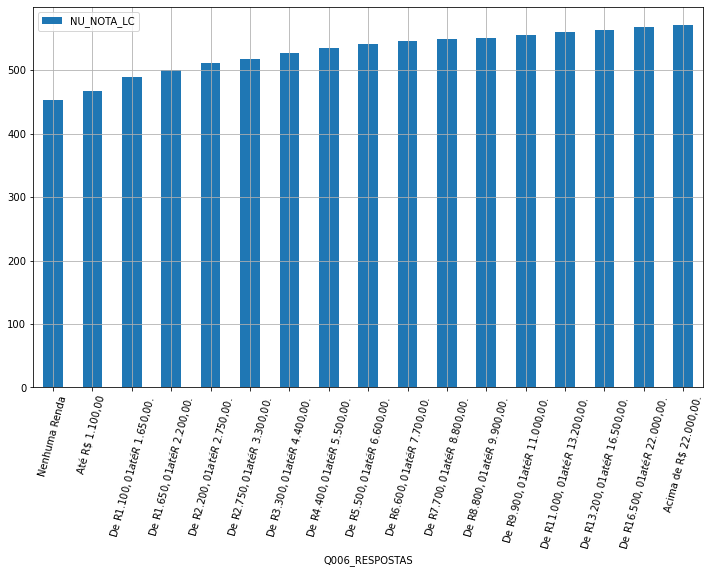

In [72]:
# NOTA DE LÍNGUAS
#----------------
DF_ENEM_Q006[['Q006_RESPOSTAS', 'NU_NOTA_LC']].groupby('Q006_RESPOSTAS').mean().sort_values(by = 'NU_NOTA_LC').plot(kind = 'bar', figsize = (12, 7), grid = True)
plt.xticks(rotation=75)

In [84]:
# NOTA DE LÍNGUAS- ESTATÍSTICA DESCRITIVA
#----------------------------------------
DF_ENEM_Q006[['Q006_RESPOSTAS', 'NU_NOTA_LC']].groupby('Q006_RESPOSTAS').describe()

NU_NOTA_LC                              \
                                       count        mean        std  min   
Q006_RESPOSTAS                                                             
Acima de R$ 22.000,00.               42057.0  571.186535  71.690982  0.0   
Até R$ 1.100,00                     588935.0  467.995687  72.139789  0.0   
De R$ 1.100,01 até R$ 1.650,00.     372201.0  489.505406  72.616676  0.0   
De R$ 1.650,01 até R$ 2.200,00.     295951.0  500.647416  72.670221  0.0   
De R$ 11.000,01 até R$ 13.200,00.    31212.0  560.716090  71.293382  0.0   
De R$ 13.200,01 até R$ 16.500,00.    34188.0  564.233444  71.291884  0.0   
De R$ 16.500,01 até R$ 22.000,00.    34197.0  567.739638  71.712385  0.0   
De R$ 2.200,01 até R$ 2.750,00.     152297.0  511.002909  72.852074  0.0   
De R$ 2.750,01 até R$ 3.300,00.     176865.0  517.533995  72.554020  0.0   
De R$ 3.300,01 até R$ 4.400,00.     154584.0  527.028397  72.934858  0.0   
De R$ 4.400,01 até R$ 5.500,00.     123949.0  534.544225  72.791895  0.0   
De R$ 5.500,01 até R$ 6.600,00.      78592.0  540.668153  72.606110  0.0   
De R$ 6.600,01 até R$ 7.700,00.      48832.0  546.135548  72.097652  0.0   
De R$ 7.700,01 até R$ 8.800,00.      38613.0  548.827374  72.508834  0.0   
De R$ 8.800,01 até R$ 9.900,00.      33900.0  551.396032  72.634317  0.0   
De R$ 9.900,01 até R$ 11.000,00.     49832.0  554.861553  72.079081  0.0   
Nenhuma Renda                       122173.0  452.462473  71.969191  0.0   

                                                               
                                     25%    50%    75%    max  
Q006_RESPOSTAS                                                 
Acima de R$ 22.000,00.             531.6  578.6  619.7  802.9  
Até R$ 1.100,00                    415.6  468.1  518.8  778.6  
De R$ 1.100,01 até R$ 1.650,00.    439.9  492.8  540.6  821.6  
De R$ 1.650,01 até R$ 2.200,00.    452.2  504.8  551.6  792.4  
De R$ 11.000,01 até R$ 13.200,00.  518.0  567.2  609.8  826.1  
De R$ 13.200,01 até R$ 16.500,00.  522.8  571.2  612.8  796.5  
De R$ 16.500,01 até R$ 22.000,00.  527.1  575.2  616.2  805.7  
De R$ 2.200,01 até R$ 2.750,00.    464.3  515.5  561.8  802.9  
De R$ 2.750,01 até R$ 3.300,00.    471.5  522.7  567.5  813.2  
De R$ 3.300,01 até R$ 4.400,00.    481.2  532.8  577.7  784.5  
De R$ 4.400,01 até R$ 5.500,00.    489.5  540.1  584.9  820.5  
De R$ 5.500,01 até R$ 6.600,00.    496.2  546.8  590.8  820.5  
De R$ 6.600,01 até R$ 7.700,00.    502.7  552.4  595.6  783.7  
De R$ 7.700,01 até R$ 8.800,00.    504.9  555.4  599.0  790.2  
De R$ 8.800,01 até R$ 9.900,00.    507.6  558.5  601.3  780.9  
De R$ 9.900,01 até R$ 11.000,00.   512.3  561.6  604.3  790.8  
Nenhuma Renda                      399.8  448.6  501.3  745.1

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Nenhuma Renda'),
  Text(1, 0, 'Até R$ 1.100,00'),
  Text(2, 0, 'De R$ 1.100,01 até R$ 1.650,00.'),
  Text(3, 0, 'De R$ 1.650,01 até R$ 2.200,00.'),
  Text(4, 0, 'De R$ 2.200,01 até R$ 2.750,00.'),
  Text(5, 0, 'De R$ 2.750,01 até R$ 3.300,00.'),
  Text(6, 0, 'De R$ 3.300,01 até R$ 4.400,00.'),
  Text(7, 0, 'De R$ 4.400,01 até R$ 5.500,00.'),
  Text(8, 0, 'De R$ 5.500,01 até R$ 6.600,00.'),
  Text(9, 0, 'De R$ 6.600,01 até R$ 7.700,00.'),
  Text(10, 0, 'De R$ 7.700,01 até R$ 8.800,00.'),
  Text(11, 0, 'De R$ 8.800,01 até R$ 9.900,00.'),
  Text(12, 0, 'De R$ 9.900,01 até R$ 11.000,00.'),
  Text(13, 0, 'De R$ 11.000,01 até R$ 13.200,00.'),
  Text(14, 0, 'De R$ 13.200,01 até R$ 16.500,00.'),
  Text(15, 0, 'De R$ 16.500,01 até R$ 22.000,00.'),
  Text(16, 0, 'Acima de R$ 22.000,00.')])

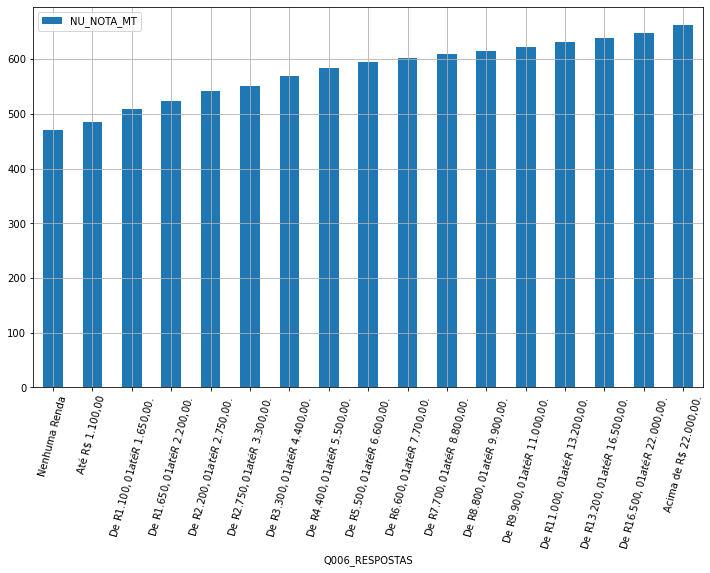

In [73]:
# NOTA DE MATEMÁTICA
#--------------------
DF_ENEM_Q006[['Q006_RESPOSTAS', 'NU_NOTA_MT']].groupby('Q006_RESPOSTAS').mean().sort_values(by = 'NU_NOTA_MT').plot(kind = 'bar', figsize = (12, 7), grid = True)
plt.xticks(rotation=75)

In [83]:
# NOTA DE MATEMÁTICA- ESTATÍSTICA DESCRITIVA
#-------------------------------------------
DF_ENEM_Q006[['Q006_RESPOSTAS', 'NU_NOTA_MT']].groupby('Q006_RESPOSTAS').describe()

NU_NOTA_MT                               \
                                       count        mean         std  min   
Q006_RESPOSTAS                                                              
Acima de R$ 22.000,00.               40123.0  662.373788  115.995552  0.0   
Até R$ 1.100,00                     548988.0  484.891154   84.331961  0.0   
De R$ 1.100,01 até R$ 1.650,00.     347915.0  509.401867   93.453119  0.0   
De R$ 1.650,01 até R$ 2.200,00.     278546.0  524.021574   98.367846  0.0   
De R$ 11.000,01 até R$ 13.200,00.    30142.0  632.135565  115.533411  0.0   
De R$ 13.200,01 até R$ 16.500,00.    32989.0  639.541687  114.929159  0.0   
De R$ 16.500,01 até R$ 22.000,00.    32933.0  647.940622  115.500579  0.0   
De R$ 2.200,01 até R$ 2.750,00.     144398.0  541.966272  103.408837  0.0   
De R$ 2.750,01 até R$ 3.300,00.     168484.0  551.211488  104.946691  0.0   
De R$ 3.300,01 até R$ 4.400,00.     148032.0  568.856219  108.595422  0.0   
De R$ 4.400,01 até R$ 5.500,00.     119090.0  583.449957  111.014347  0.0   
De R$ 5.500,01 até R$ 6.600,00.      75664.0  594.182387  112.649516  0.0   
De R$ 6.600,01 até R$ 7.700,00.      47088.0  602.977531  113.206810  0.0   
De R$ 7.700,01 até R$ 8.800,00.      37263.0  609.441940  114.031049  0.0   
De R$ 8.800,01 até R$ 9.900,00.      32657.0  614.467401  114.285314  0.0   
De R$ 9.900,01 até R$ 11.000,00.     48016.0  623.221335  114.868824  0.0   
Nenhuma Renda                       113515.0  470.193677   78.879200  0.0   

                                                               
                                     25%    50%    75%    max  
Q006_RESPOSTAS                                                 
Acima de R$ 22.000,00.             590.1  674.6  742.2  953.1  
Até R$ 1.100,00                    421.2  466.2  532.9  953.1  
De R$ 1.100,01 até R$ 1.650,00.    435.8  492.2  571.0  953.1  
De R$ 1.650,01 até R$ 2.200,00.    445.2  508.8  592.6  953.1  
De R$ 11.000,01 até R$ 13.200,00.  550.8  642.9  713.8  953.1  
De R$ 13.200,01 até R$ 16.500,00.  562.0  650.4  719.6  953.1  
De R$ 16.500,01 até R$ 22.000,00.  572.0  661.3  728.7  953.1  
De R$ 2.200,01 até R$ 2.750,00.    457.7  531.0  617.2  953.1  
De R$ 2.750,01 até R$ 3.300,00.    465.2  543.0  628.2  953.1  
De R$ 3.300,01 até R$ 4.400,00.    480.1  566.1  650.0  953.1  
De R$ 4.400,01 até R$ 5.500,00.    493.2  585.5  665.3  953.1  
De R$ 5.500,01 até R$ 6.600,00.    504.4  598.3  677.0  953.1  
De R$ 6.600,01 até R$ 7.700,00.    514.5  609.7  685.8  953.1  
De R$ 7.700,01 até R$ 8.800,00.    521.9  617.7  691.1  953.1  
De R$ 8.800,01 até R$ 9.900,00.    526.8  622.9  697.6  953.1  
De R$ 9.900,01 até R$ 11.000,00.   538.8  633.3  705.6  953.1  
Nenhuma Renda                      412.9  451.9  509.6  929.1

### <i> Insight:</i> RENDA FAMILIAR MENSAL é um ótimo indicativo para as notas.
##### - Observamos <b>linearidade dos dados</b>!

______________________

### E se quisermos analisar os dados socioeconômicos de qualquer questão de acordo com o ESTADO DE RESIDÊNCIA dos inscritos (Estado da escola)?
##### - Funcionalidade do PANDAS: dataframe<b>.where(</b><i>condição</i><b>)</b>

In [ ]:
# RELAÇÃO ENTRE RENDA FAMILIAR MENSAL E NOTAS, NO ESTADO DO RJ
#-------------------------------------------------------------
DF_ENEM_Q006[['Q006_RESPOSTAS', 'NU_NOTA_REDACAO']]\
    .where(DF_ENEM_Q006.)
    .groupby('Q006_RESPOSTAS').mean()\
    .sort_values(by = 'NU_NOTA_REDACAO')\
    
